## Functions to Read and Processing LabOceano Movies Files

In [1]:
# libraries

import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image
from scipy import ndimage, misc

## Input files

In [18]:
# pathname = os.environ['HOME'] + '/Documents/WaveDrift/data/DERIVA_RANDOMICA/VIDEO/CAM1/T100/'
pathname = '/home/hp/Dropbox/Random_Drift/scripts/frames/'

moviefile = 'T100_010100.CAM1.avi'

# tempo dos frames iniciais e finais do video.
# tentar selecionar apenas o intervalo em que as bolinhas aparecem no video
framei    = '00:00:05.000'
framef    = '00:01:52.000'

# frequencia para salvar os frames
# freq = '30ms'
freq = '2s'

# inical do nome do frame salbo. o nome  vai ser complementado com o instante do frame
fileout   = 'frame_'

## Get frame function 

In [19]:
def get_frame(pathname, moviefile, framei, framef, freq, fileout):

    frames = pd.date_range(framei, framef, freq=freq).format(formatter=lambda x: x.strftime('%H:%M:%S.%f'))
    
    cont = 0
    for frame in frames:
        cont += 1
        os.system('cd ' + pathname  + '\n' + 
                  'ffmpeg -i ' + moviefile + ' -ss ' + frame + ' -f image2 -vframes 1 ' + fileout + str(cont).zfill(2) + '.png')


## Call Get frames

In [20]:
# get_frame(pathname,
#           moviefile,
#           framei,
#           framef,
#           freq,
#           fileout)

## Read frames 

In [21]:
pathname

'/home/hp/Dropbox/Random_Drift/scripts/frames/'

In [22]:
plt.close('all')

image_path = np.sort(glob.glob(pathname + '*.png'))

print (image_path[0])

image = imageio.imread(image_path[0])
print (image.shape)
print (image.dtype)

# for image_path in glob.glob(pathname + '*.png'):
#     image = imageio.imread(image_path)


/home/hp/Dropbox/Random_Drift/scripts/frames/alive_parrot.png
(1080, 1920, 3)
uint8


In [24]:
im = Image.open(image_path[0]) #Can be many different formats.
pix = im.load()
print ('image size: %s' %str(im.size)) #Get the width and hight of the image for iterating over
print ('RGBA od the pixel image: %s' %str(pix[0,0])) #Get the RGBA Value of the a pixel of an image
pix[0,0] = (255, 155, 40) # Set the RGBA Value of the image (tuple)
pix[0,0] = (256, 256, 256) # Set the RGBA Value of the image (tuple)

width, height = im.size

pixel_values = list(im.getdata())

im.save("alive_parrot.png") # Save the modified pixels as png

image size: (1920, 1080)
RGBA od the pixel image: (255, 255, 255)


----


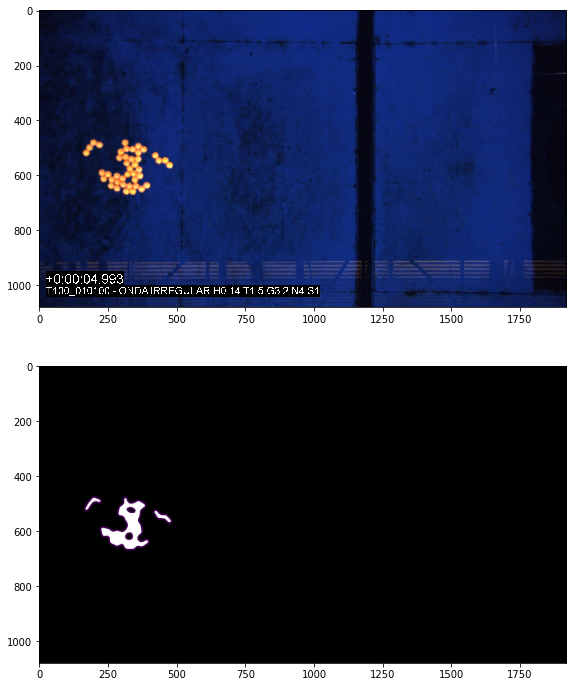

----


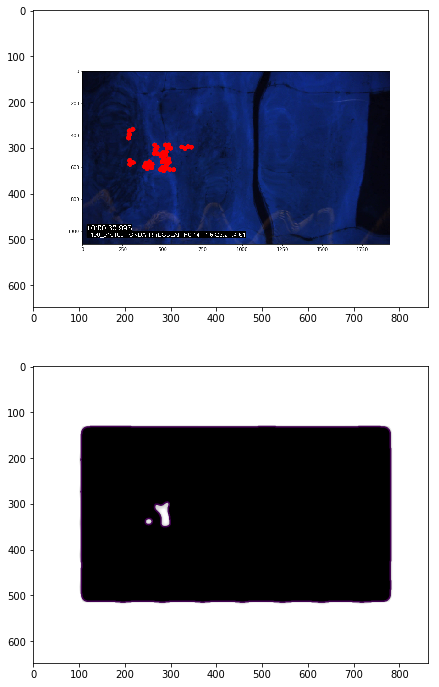

----


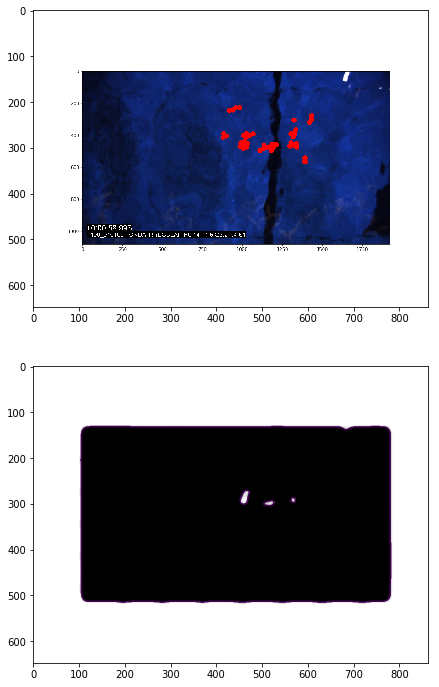

In [25]:
# parametros de entrada


# valor de contraste das bolinhas com a agua (default=200)
cb = 150

for filename in image_path[::15]:
    
    im1 = misc.imread(filename)
    # im = misc.imread(pathname)

    im = im1[:,:,0]

    im = ndimage.gaussian_filter(im, 8)

    # im[:,:] = 0
    im[np.where(im<cb)] = 256
    im[np.where(im<=cb)] = 0

    # f = misc.face(gray=True)  # retrieve a grbayscale image

    plt.figure(figsize=(12,12))
    plt.subplot(211)
    plt.imshow(im1, cmap=plt.cm.gray,  vmin=30, vmax=200)
    plt.subplot(212)
    plt.imshow(im, cmap=plt.cm.gray,  vmin=30, vmax=200)
    print ('----')

    plt.contour(im, [cb])

    plt.show()

## Image processing

In [26]:
# achar valores do pixel das bolas

plt.close('all')
%matplotlib qt5

im = misc.imread(filename)
im[0][0] == np.array([7,8,27])

plt.imshow(im)
plt.show()
print("Please click")
# x = plt.ginput(1)
print("clicked", x)


/usr/local/python/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  import sys


Please click


NameError: name 'x' is not defined

In [ ]:
%matplotlib inline
# %matplotlib qt5

rgb1 = np.array([250,140,10])
rgb2 = np.array([256,256,220])
pxs = 1

for filename in image_path:

    im = misc.imread(filename)

    x, y = [], []
    for l in range(0,im.shape[0],pxs):#pula de 10 em 10 pixels
        for c in range(0,im.shape[1],pxs):
            if (im[l][c] >= rgb1).all() & (im[l][c] < rgb2).all():
    #             print (im[l][c])
                x.append(c)
                y.append(l)

    plt.close('all')

    plt.figure(figsize=(12,9))
    plt.imshow(im)
    plt.plot(x,y,'r.')
    plt.savefig(filename[-10:] + '.png')
    plt.close('all')

# plt.show()
        